In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import sklearn
sklearn.__version__
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2 = pd.read_csv('../cleaned_processed.cleveland.data',header=None,names = columns)
df2.columns
feature = columns[:13]
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
dataset2 = df2.values

In [4]:
X2 = dataset2[:,0:13]
Y2 = dataset2[:,13]

In [5]:
min_max_scaler2 = preprocessing.MinMaxScaler()
X_scale2 = min_max_scaler2.fit_transform(X2)

In [6]:
X_train2, X_val_and_test2, Y_train2, Y_val_and_test2 = train_test_split(X_scale2, Y2, test_size=0.2)


In [7]:
X_val2, X_test2, Y_val2, Y_test2 = train_test_split(X_val_and_test2, Y_val_and_test2, test_size=0.2)

In [8]:
model2 = Sequential([
    Dense(12, activation='relu', input_shape=(13,)),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [9]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
hist2 = model2.fit(X_train2, Y_train2,
          batch_size=12, epochs=100,
          validation_data=(X_val2, Y_val2))

Epoch 1/100
20/20 [==============================] - 2s 52ms/step - loss: 0.6976 - accuracy: 0.4546 - val_loss: 0.6942 - val_accuracy: 0.5625
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.4396 - val_loss: 0.6835 - val_accuracy: 0.5625
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6747 - accuracy: 0.5467 - val_loss: 0.6710 - val_accuracy: 0.5833
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6556 - accuracy: 0.5873 - val_loss: 0.6582 - val_accuracy: 0.6042
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6317 - accuracy: 0.7009 - val_loss: 0.6440 - val_accuracy: 0.6250
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6191 - accuracy: 0.7645 - val_loss: 0.6310 - val_accuracy: 0.6458
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5846 - accuracy: 0.8049 - val_loss: 0.6201 - val_accuracy: 0.6458
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3163 - accuracy: 0.8487 - val_loss: 0.5225 - val_accuracy: 0.7708
Epoch 60/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2877 - accuracy: 0.8906 - val_loss: 0.5179 - val_accuracy: 0.7917
Epoch 61/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2966 - accuracy: 0.8898 - val_loss: 0.5141 - val_accuracy: 0.7917
Epoch 62/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2979 - accuracy: 0.8661 - val_loss: 0.5195 - val_accuracy: 0.7708
Epoch 63/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.8662 - val_loss: 0.5192 - val_accuracy: 0.7708
Epoch 64/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8639 - val_loss: 0.5210 - val_accuracy: 0.7708
Epoch 65/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8863 - val_loss: 0.5221 - val_accuracy: 0.7708
Epoch 

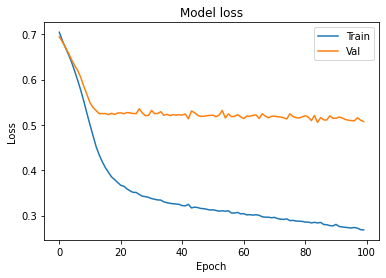

In [11]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

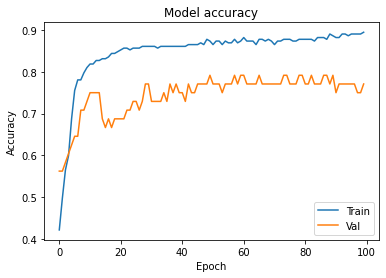

In [12]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
model2.evaluate(X_test2, Y_test2)[1]

1/1 [==============================] - 0s 140ms/step - loss: 0.6472 - accuracy: 0.7500


0.75

In [14]:
model4 = Sequential([
    Dense(62, activation='relu', input_shape=(13,)),
    Dense(62, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [15]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
hist4 = model4.fit(X_train2, Y_train2,
          batch_size=62, epochs=100,
          validation_data=(X_val2, Y_val2))

Epoch 1/100
4/4 [==============================] - 1s 82ms/step - loss: 0.6769 - accuracy: 0.6143 - val_loss: 0.6956 - val_accuracy: 0.5208
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6577 - accuracy: 0.7038 - val_loss: 0.6683 - val_accuracy: 0.6458
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 0.6330 - accuracy: 0.8144 - val_loss: 0.6486 - val_accuracy: 0.7292
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.6027 - accuracy: 0.8454 - val_loss: 0.6287 - val_accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5861 - accuracy: 0.8607 - val_loss: 0.6108 - val_accuracy: 0.7708
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 0.5552 - accuracy: 0.8678 - val_loss: 0.5913 - val_accuracy: 0.7708
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.5364 - accuracy: 0.8517 - val_loss: 0.5704 - val_accuracy: 0.7917
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 21ms/step - loss: 0.2536 - accuracy: 0.9071 - val_loss: 0.5666 - val_accuracy: 0.8333
Epoch 60/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2391 - accuracy: 0.9156 - val_loss: 0.5827 - val_accuracy: 0.8333
Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2603 - accuracy: 0.8785 - val_loss: 0.5671 - val_accuracy: 0.8333
Epoch 62/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2080 - accuracy: 0.9238 - val_loss: 0.5650 - val_accuracy: 0.8333
Epoch 63/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2108 - accuracy: 0.9211 - val_loss: 0.5738 - val_accuracy: 0.8333
Epoch 64/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2111 - accuracy: 0.9260 - val_loss: 0.5828 - val_accuracy: 0.8333
Epoch 65/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2278 - accuracy: 0.9169 - val_loss: 0.5815 - val_accuracy: 0.8333
Epoch 66/100
4/4 [========

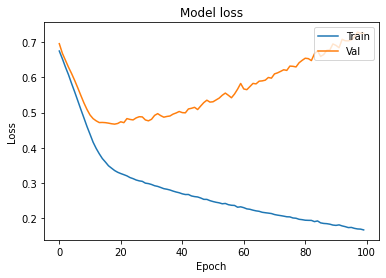

In [17]:
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

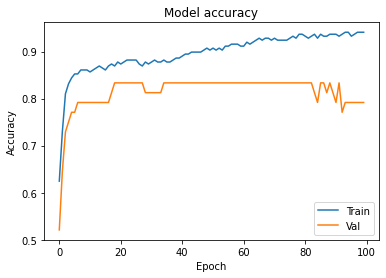

In [18]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
model4.evaluate(X_test2, Y_test2)[1]

1/1 [==============================] - 0s 32ms/step - loss: 0.8260 - accuracy: 0.7500


0.75